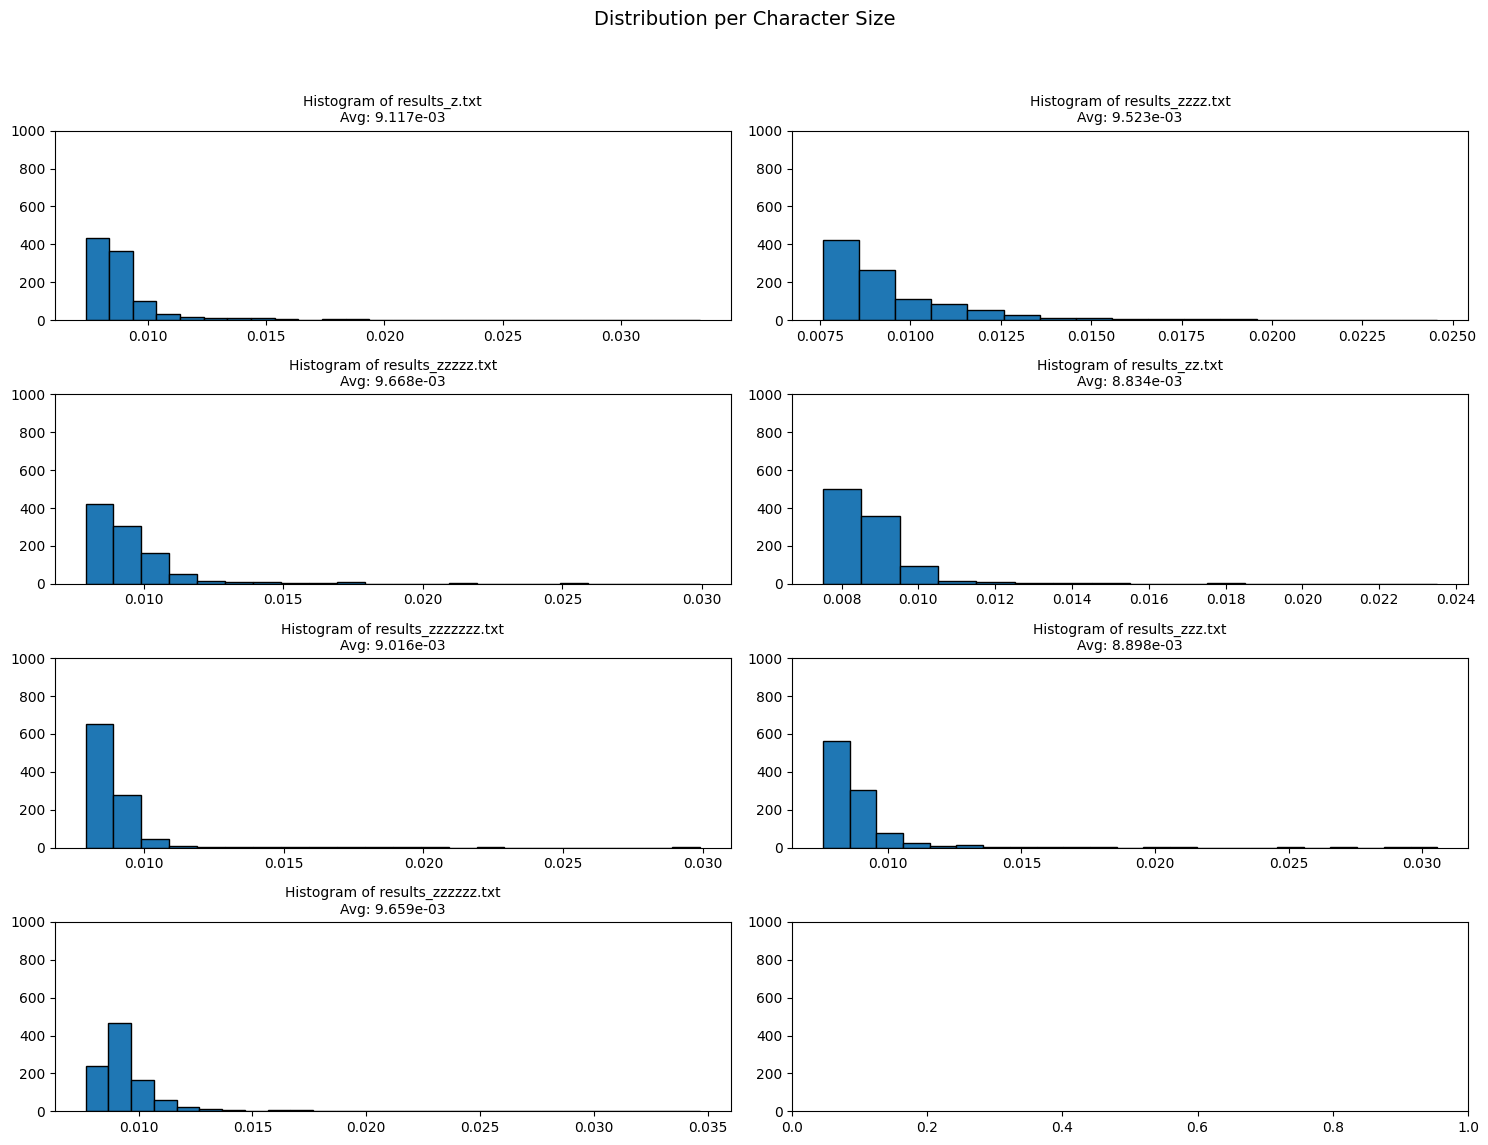

In [22]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Get a list of all .txt files in the folder
txt_files = [file for file in os.listdir() if file.endswith('.txt')]

# Calculate the number of subplots needed (limited to 7 plots)
num_files = len(txt_files)
num_rows = 4
num_cols = 2

# Create a grid of subplots (limited to 7 plots)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Plot histograms for each .txt file and calculate maximum y-axis value
max_y = 0
for i, txt_file in enumerate(txt_files):

    row = i // num_cols
    col = i % num_cols

    numbers = []
    with open(txt_file, 'r') as file:
        for line in file:
            numbers.append(float(line.strip()))

    # Calculate the average
    avg_value = np.mean(numbers)

    # Plot histogram with 1 bin per 0.001
    bins = np.arange(min(numbers), max(numbers) + 0.001, 0.001)
    counts, bins, patches = axs[row, col].hist(numbers, bins=bins, edgecolor='black')
    max_y = max(max_y, max(counts))

    # Set title for each histogram including the average value
    axs[row, col].set_title(f'Histogram of {txt_file}\nAvg: {avg_value:.3e}', fontsize=10)

# Set y-axis limits for all subplots
for ax in axs.flat:
    ax.set_ylim(0, 1000)  # Adjust the y-axis limit as needed

# Set common labels and total title
#fig.text(0.5, 0.04, 'Value', ha='center', fontsize=12)
#fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=12)
plt.suptitle('Distribution per Character Size', fontsize=14)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
